In [1]:
import os

# Set the root directory for PET data
root_dir = "D:\\CIP_PET"

# Iterate through each category and count files
for category in ["CN", "MCI", "AD"]:
    folder_path = os.path.join(root_dir, category)
    if os.path.exists(folder_path):
        file_count = sum(len(files) for _, _, files in os.walk(folder_path))
        print(f"{category}: {file_count} files")
    else:
        print(f"{category} folder not found!")


CN: 154861 files
MCI: 286078 files
AD: 90754 files


In [3]:
import os

cn_folder = "D:/CIP_PET/CN"
mci_folder = "D:/CIP_PET/MCI"
ad_folder = "D:/CIP_PET/AD"

print("CN files:", len(os.listdir(cn_folder)))
print("MCI files:", len(os.listdir(mci_folder)))
print("AD files:", len(os.listdir(ad_folder)))


CN files: 275
MCI files: 526
AD files: 200


In [5]:
import os
folder_path = "D:/CIP_PET/CN"
print(os.listdir(folder_path))

['002_S_0295', '002_S_0413', '002_S_0685', '002_S_1261', '002_S_1280', '002_S_4213', '002_S_4225', '002_S_4262', '002_S_4270', '002_S_5178', '002_S_5230', '002_S_5256', '003_S_0907', '003_S_0981', '003_S_4081', '003_S_4119', '003_S_4288', '003_S_4350', '003_S_4441', '003_S_4555', '003_S_4644', '003_S_4872', '003_S_4900', '003_S_5130', '003_S_5150', '003_S_5154', '003_S_5209', '006_S_0484', '006_S_0498', '006_S_0731', '006_S_4150', '006_S_4357', '006_S_4449', '006_S_4485', '007_S_1206', '007_S_4387', '007_S_4488', '007_S_4516', '007_S_4620', '007_S_4637', '007_S_5265', '009_S_0751', '009_S_0842', '009_S_0862', '009_S_4337', '009_S_4388', '009_S_4612', '009_S_5125', '009_S_5147', '009_S_5176', '010_S_0067', '011_S_0021', '011_S_0023', '011_S_4075', '011_S_4105', '011_S_4120', '011_S_4222', '011_S_4278', '012_S_0637', '012_S_1133', '012_S_4026', '012_S_4545', '012_S_4643', '012_S_5121', '012_S_5157', '012_S_5195', '012_S_5213', '013_S_0502', '013_S_0575', '013_S_4579', '013_S_4580', '013_

In [7]:
import os
import shutil

folder_path = "D:/CIP_PET/CN"
output_path = "D:/CIP_PET/output"

os.makedirs(output_path, exist_ok=True)

for root, _, files in os.walk(folder_path):  # Walk through all subdirectories
    for file in files:
        src = os.path.join(root, file)
        dst = os.path.join(output_path, file)

        if file.startswith('.') or not os.access(src, os.R_OK):
            print(f"Skipping {file} (No permission)")
            continue

        try:
            shutil.copy(src, dst)
        except PermissionError:
            print(f"Skipping {file} (Permission Denied)")
        except Exception as e:
            print(f"Error copying {file}: {e}")

print("Copying complete!")


Copying complete!


In [9]:
import os
print(len(os.listdir("D:/CIP_PET/output")))

154861


In [11]:
import os

folder_path = "D:/CIP_PET/CN"

for subject in os.listdir(folder_path):
    subject_path = os.path.join(folder_path, subject)
    
    # Check if it's a directory (not a file)
    if os.path.isdir(subject_path):
        image_files = os.listdir(subject_path)

        if len(image_files) == 0:
            print(f"⚠️ No images found inside: {subject_path}")
        else:
            print(f"✅ {len(image_files)} images found in {subject_path}")


✅ 1 images found in D:/CIP_PET/CN\002_S_0295
✅ 1 images found in D:/CIP_PET/CN\002_S_0413
✅ 1 images found in D:/CIP_PET/CN\002_S_0685
✅ 1 images found in D:/CIP_PET/CN\002_S_1261
✅ 1 images found in D:/CIP_PET/CN\002_S_1280
✅ 1 images found in D:/CIP_PET/CN\002_S_4213
✅ 1 images found in D:/CIP_PET/CN\002_S_4225
✅ 1 images found in D:/CIP_PET/CN\002_S_4262
✅ 1 images found in D:/CIP_PET/CN\002_S_4270
✅ 1 images found in D:/CIP_PET/CN\002_S_5178
✅ 1 images found in D:/CIP_PET/CN\002_S_5230
✅ 1 images found in D:/CIP_PET/CN\002_S_5256
✅ 1 images found in D:/CIP_PET/CN\003_S_0907
✅ 1 images found in D:/CIP_PET/CN\003_S_0981
✅ 2 images found in D:/CIP_PET/CN\003_S_4081
✅ 1 images found in D:/CIP_PET/CN\003_S_4119
✅ 1 images found in D:/CIP_PET/CN\003_S_4288
✅ 1 images found in D:/CIP_PET/CN\003_S_4350
✅ 1 images found in D:/CIP_PET/CN\003_S_4441
✅ 1 images found in D:/CIP_PET/CN\003_S_4555
✅ 1 images found in D:/CIP_PET/CN\003_S_4644
✅ 1 images found in D:/CIP_PET/CN\003_S_4872
✅ 1 images

In [13]:
!pip install pydicom

In [23]:
#data preprocessing
import os
import numpy as np
import cv2
import pydicom
from tqdm import tqdm

# Set paths
input_dir = "D:/CIP_PET"
output_dir = "D:/CIP_PET/preprocessed_dti_images"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

def preprocess_dti(image):
    """Preprocess DTI image by normalizing and converting to uint8."""
    eps = 1e-8  # Small value to prevent division by zero
    image = image.astype(np.float32)

    # Normalize image
    img_min, img_max = image.min(), image.max()
    if img_max > img_min:  # Avoid division by zero
        image = (image - img_min) / (img_max - img_min + eps)
    else:
        image = np.zeros_like(image)  # If all values are the same, make it blank

    # Convert NaNs to 0
    image = np.nan_to_num(image)

    return image

def process_patient_images(patient_path, output_path):
    """Process all DTI images for a single patient."""
    os.makedirs(output_path, exist_ok=True)

    for filename in os.listdir(patient_path):
        if filename.endswith(".dcm"):
            file_path = os.path.join(patient_path, filename)

            try:
                dicom_data = pydicom.dcmread(file_path)
                img_array = dicom_data.pixel_array

                # Preprocess image
                processed_img = preprocess_dti(img_array)

                # Save as PNG
                output_file = os.path.join(output_path, filename.replace(".dcm", ".png"))
                cv2.imwrite(output_file, (processed_img * 255).astype(np.uint8))

            except Exception as e:
                print(f"Skipping {file_path} (Failed to load): {e}")

# Iterate through class folders (CN, MCI, AD)
for class_label in ["CN", "MCI", "AD"]:
    class_path = os.path.join(input_dir, class_label)
    output_class_path = os.path.join(output_dir, class_label)

    os.makedirs(output_class_path, exist_ok=True)

    patient_folders = sorted(os.listdir(class_path))
    print(f"Processing {class_label}: ")

    for patient_folder in tqdm(patient_folders):
        patient_path = os.path.join(class_path, patient_folder)
        output_patient_path = os.path.join(output_class_path, patient_folder)

        process_patient_images(patient_path, output_patient_path)

print("✅ Preprocessing Complete!")


Processing CN: 


100%|██████████| 275/275 [00:00<00:00, 1870.46it/s]


Processing MCI: 


100%|██████████| 526/526 [00:00<00:00, 3238.13it/s]


Processing AD: 


100%|██████████| 200/200 [00:00<00:00, 3144.63it/s]

✅ Preprocessing Complete!


In [1]:
import os
import numpy as np
import cv2
import pydicom
from tqdm import tqdm

# Set paths
input_dir = "D:/CIP_PET"  # Your PET dataset root
output_dir = "D:/CIP_PET/preprocessed_pet_images"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

def preprocess_pet(image):
    """Preprocess PET image by normalizing and converting to uint8."""
    eps = 1e-8
    image = image.astype(np.float32)
    
    img_min, img_max = image.min(), image.max()
    if img_max > img_min:
        image = (image - img_min) / (img_max - img_min + eps)
    else:
        image = np.zeros_like(image)

    image = np.nan_to_num(image)
    return image

def process_patient_pet(patient_path, output_path):
    """Process all PET DICOM images recursively for a patient."""
    os.makedirs(output_path, exist_ok=True)

    for root, _, files in os.walk(patient_path):
        for filename in files:
            if filename.endswith(".dcm"):
                file_path = os.path.join(root, filename)
                try:
                    dicom_data = pydicom.dcmread(file_path)
                    img_array = dicom_data.pixel_array

                    processed_img = preprocess_pet(img_array)

                    # Generate a unique filename in case of duplicate names
                    output_file = os.path.join(output_path, filename.replace(".dcm", ".png"))
                    cv2.imwrite(output_file, (processed_img * 255).astype(np.uint8))

                except Exception as e:
                    print(f"Skipping {file_path} (Error): {e}")


# Process class folders
for class_label in ["CN", "MCI", "AD"]:
    class_path = os.path.join(input_dir, class_label)
    output_class_path = os.path.join(output_dir, class_label)

    os.makedirs(output_class_path, exist_ok=True)

    patient_folders = sorted(os.listdir(class_path))
    print(f"Processing {class_label}: ")

    for patient_folder in tqdm(patient_folders):
        patient_path = os.path.join(class_path, patient_folder)
        output_patient_path = os.path.join(output_class_path, patient_folder)

        process_patient_pet(patient_path, output_patient_path)

print("✅ PET Preprocessing Complete!")


Processing CN: 


100%|██████████| 275/275 [45:01<00:00,  9.82s/it]  


Processing MCI: 


100%|██████████| 526/526 [1:11:53<00:00,  8.20s/it]


Processing AD: 


100%|██████████| 200/200 [23:41<00:00,  7.11s/it]

✅ PET Preprocessing Complete!


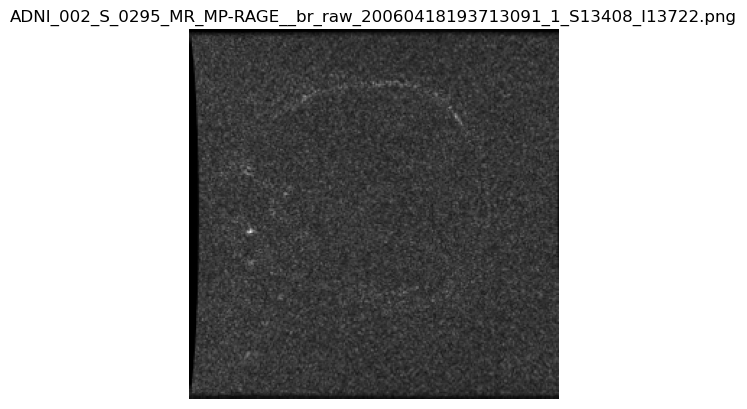

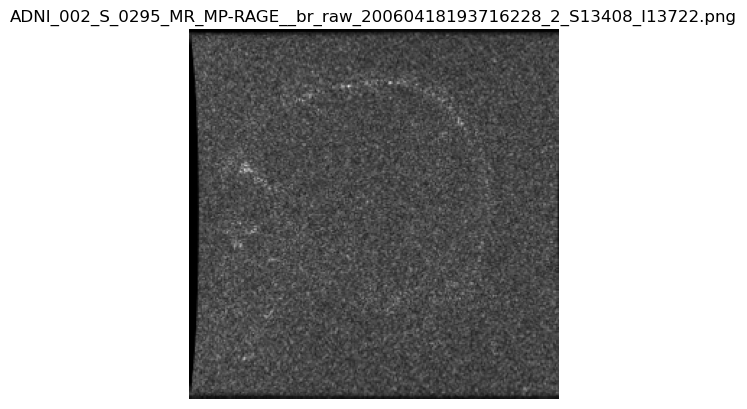

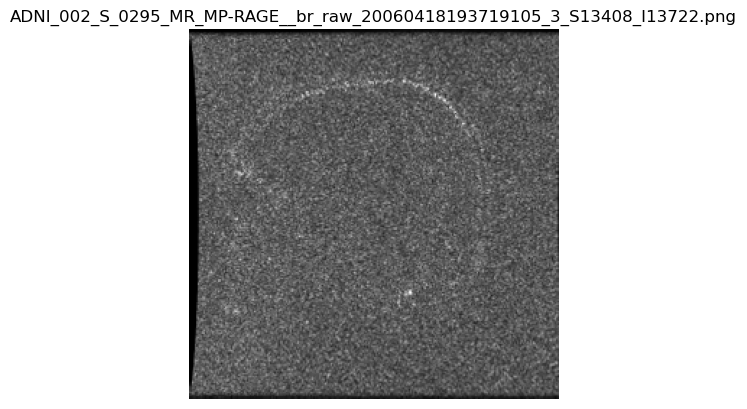

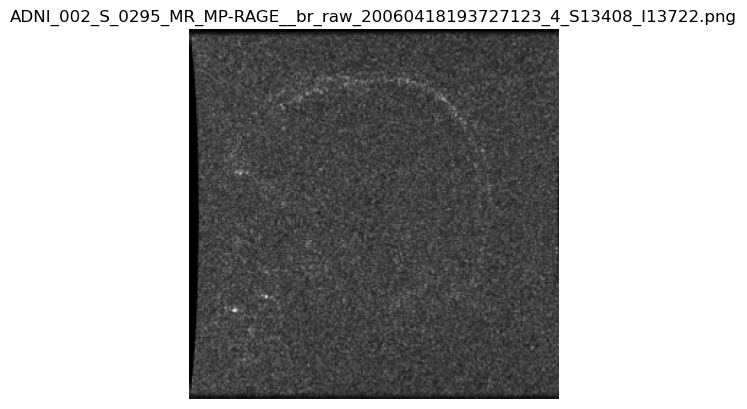

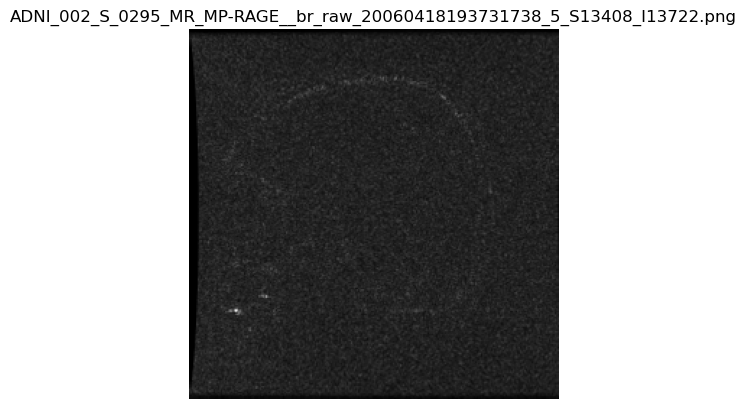

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

# Update this path to your PET preprocessed folder
folder_path = "D:/CIP_PET/preprocessed_pet_images"

# Get image files from subdirectories
image_files = []
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            image_files.append(os.path.join(root, file))

# Select a few images to display
sample_images = image_files[:5]

for img_path in sample_images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"⚠️ Error loading image: {img_path}")
        continue

    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(os.path.basename(img_path))
    plt.axis('off')

plt.show()


In [5]:
!pip install imgaug


In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------
# CONFIGURATION
# -------------------------
input_dir = "D:/CIP_PET/preprocessed_pet_images"            # PET preprocessed input folder
output_dir = "D:/CIP_PET/augmented_pet_images_balanced"     # Where balanced PET images will be stored
target_count = 286078                                        # Set to highest class (MCI)

# Augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# -------------------------
# UTILITY FUNCTIONS
# -------------------------
def get_all_image_paths(folder):
    image_paths = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    return image_paths

def copy_originals(class_in_path, class_out_path):
    os.makedirs(class_out_path, exist_ok=True)
    image_paths = get_all_image_paths(class_in_path)
    for img_path in image_paths:
        filename = os.path.basename(img_path)
        out_path = os.path.join(class_out_path, filename)
        if not os.path.exists(out_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                cv2.imwrite(out_path, img)
    return get_all_image_paths(class_out_path)

# -------------------------
# MAIN PROCESS
# -------------------------
classes = ["CN", "MCI", "AD"]

for cls in classes:
    print(f"\nProcessing class: {cls}")
    
    class_input_path = os.path.join(input_dir, cls)
    class_output_path = os.path.join(output_dir, cls)
    os.makedirs(class_output_path, exist_ok=True)
    
    original_images = copy_originals(class_input_path, class_output_path)
    original_count = len(original_images)
    print(f"  Original images copied for {cls}: {original_count}")
    
    current_count = len(get_all_image_paths(class_output_path))
    required = target_count - current_count
    print(f"  {cls}: {current_count} images in output, need {required} augmented images.")
    
    if required <= 0:
        print(f"  No augmentation needed for {cls}.")
        continue

    generated = 0
    for img_path in original_images:
        if generated >= required:
            break
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"  ❌ Skipping {img_path} (cannot read)")
            continue

        img_array = np.expand_dims(img, axis=-1)
        img_array = np.expand_dims(img_array, axis=0)
        
        aug_iter = datagen.flow(img_array, batch_size=1, shuffle=False)
        while generated < required:
            aug_img = next(aug_iter)[0]
            aug_img_uint8 = (np.clip(aug_img, 0, 1) * 255).astype(np.uint8).squeeze()
            new_filename = f"aug_{generated}_" + os.path.basename(img_path).split('.')[0] + ".png"
            save_path = os.path.join(class_output_path, new_filename)
            cv2.imwrite(save_path, aug_img_uint8)
            generated += 1
            if generated % 100 == 0:
                print(f"  {cls}: Generated {generated}/{required} augmented images...")

    total_after = len(get_all_image_paths(class_output_path))
    print(f"  {cls}: Augmentation complete. Total images now: {total_after}")

print("\n🎉 PET data augmentation and balancing complete!")



Processing class: CN
  Original images copied for CN: 154540
  CN: 154540 images in output, need 131538 augmented images.
  CN: Generated 100/131538 augmented images...
  CN: Generated 200/131538 augmented images...
  CN: Generated 300/131538 augmented images...
  CN: Generated 400/131538 augmented images...
  CN: Generated 500/131538 augmented images...
  CN: Generated 600/131538 augmented images...
  CN: Generated 700/131538 augmented images...
  CN: Generated 800/131538 augmented images...
  CN: Generated 900/131538 augmented images...
  CN: Generated 1000/131538 augmented images...
  CN: Generated 1100/131538 augmented images...
  CN: Generated 1200/131538 augmented images...
  CN: Generated 1300/131538 augmented images...
  CN: Generated 1400/131538 augmented images...
  CN: Generated 1500/131538 augmented images...
  CN: Generated 1600/131538 augmented images...
  CN: Generated 1700/131538 augmented images...
  CN: Generated 1800/131538 augmented images...
  CN: Generated 1900/1

In [10]:
import os

dataset_path = "D:/CIP_PET/augmented_pet_images_balanced"  # Update if needed

for category in ["CN", "MCI", "AD"]:
    class_path = os.path.join(dataset_path, category)
    count = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    print(f"{category}: {count} images")


CN: 286078 images
MCI: 286078 images
AD: 286078 images


In [12]:
import os
import shutil
import random

# Set paths
input_dir = "D:/CIP_PET/augmented_pet_images_balanced"  # Update with your actual dataset path
output_dir = "D:/CIP_PET/split_pet_images"

# Train/Val/Test split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Categories
categories = ["CN", "MCI", "AD"]

# Create output directories
for split in ["train", "val", "test"]:
    for category in categories:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Function to split dataset
def split_data():
    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)
        random.shuffle(images)

        # Split
        train_count = int(len(images) * train_ratio)
        val_count = int(len(images) * val_ratio)

        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # Move images
        for img in train_images:
            shutil.move(os.path.join(category_path, img), os.path.join(output_dir, "train", category, img))

        for img in val_images:
            shutil.move(os.path.join(category_path, img), os.path.join(output_dir, "val", category, img))
 
        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(output_dir, "test", category, img))

        print(f"✅ {category}: Train={len(train_images)}, Val={len(val_images)}, Test={len(test_images)}")

# Run the split
split_data()
print("🎯 Dataset successfully split into Train/Val/Test sets!")


✅ CN: Train=228862, Val=28607, Test=28609
✅ MCI: Train=228862, Val=28607, Test=28609
✅ AD: Train=228862, Val=28607, Test=28609
🎯 Dataset successfully split into Train/Val/Test sets!


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "D:/CIP_PET/split_pet_images/train"

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', color_mode='grayscale'
)

print(train_generator.class_indices)


Found 686586 images belonging to 3 classes.
{'AD': 0, 'CN': 1, 'MCI': 2}


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(224, 224, 1)),  # Explicitly define input shape
    Conv2D(32, (3,3), activation='relu'),  
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: CN, MCI, AD
])


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training and validation (grayscale conversion)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation

# Training Data
train_generator = train_datagen.flow_from_directory(
    'D:/CIP_PET/split_pet_images/train',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Validation Data
val_generator = val_datagen.flow_from_directory(
    'D:/CIP_PET/split_pet_images/val',  # Path to validation folder
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model with Validation
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator  # Include validation data
)

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# Save Model
model.save("D:/CIP_PET/PET_Model.h5")


Found 686586 images belonging to 3 classes.
Found 85821 images belonging to 3 classes.


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
21456/21456 ━━━━━━━━━━━━━━━━━━━━ 31044s 1s/step - accuracy: 0.7779 - loss: 0.4897 - val_accuracy: 0.8864 - val_loss: 0.2675
Epoch 2/5
21456/21456 ━━━━━━━━━━━━━━━━━━━━ 32020s 1s/step - accuracy: 0.9193 - loss: 0.1985 - val_accuracy: 0.9219 - val_loss: 0.1950
Epoch 3/5
21456/21456 ━━━━━━━━━━━━━━━━━━━━ 38994s 2s/step - accuracy: 0.9531 - loss: 0.1190 - val_accuracy: 0.9297 - val_loss: 0.1936
Epoch 4/5
  915/21456 ━━━━━━━━━━━━━━━━━━━━ 7:53:23 1s/step - accuracy: 0.9738 - loss: 0.0683

KeyboardInterrupt: 

In [20]:
# Save Model
model.save("D:/CIP_PET/PET_Model.h5")


In [24]:
import os
import numpy as np

test_images_dir = "D:\\CIP_PET\\split_pet_images\\test\\CN"  # Update this if needed

# Ensure the directory exists
if not os.path.exists(test_images_dir):
    print("Error: Test image directory not found.")
else:
    # List all files (ensure it's only image files)
    all_files = os.listdir(test_images_dir)
    test_images = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Check if there are any images before selecting
    if not test_images:
        print("Error: No image files found in the test directory.")
    else:
        img_name = np.random.choice(test_images)
        img_path = os.path.join(test_images_dir, img_name)
        print("Selected Image:", img_path)


Selected Image: D:\CIP_PET\split_pet_images\test\CN\aug_84939_ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102406227_49_S111104_I239487.png


In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define image path
img_path = r"D:\CIP_PET\split_pet_images\test\CN\aug_84939_ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102406227_49_S111104_I239487.png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Print shape to verify
print("Image shape:", img_array.shape)
    

Image shape: (1, 224, 224, 3)


In [36]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r"D:\CIP_PET\PET_Model.h5")
print("Model loaded successfully!")


Model loaded successfully!


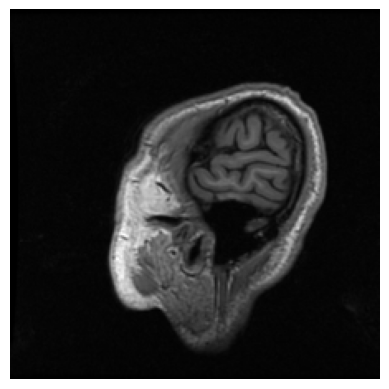

In [42]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to your test image
image_path = r"D:\CIP_PET\split_pet_images\test\AD\ADNI_002_S_0295_MR_MP-RAGE__br_raw_20060418193916588_32_S13408_I13722.png"# Update with your actual test image path

# Load and preprocess the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale since model was trained on grayscale
img = cv2.resize(img, (224, 224))  # Resize to match model input
img = img / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = np.expand_dims(img, axis=-1)  # Add channel dimension (224, 224, 1)

# Display the image
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")
plt.show()


In [44]:
# Predict using the model
predictions = model.predict(img)

# Get the predicted class index
predicted_class = np.argmax(predictions, axis=1)

# Define class labels (modify if needed)
class_labels = {0: "AD", 1: "CN", 2: "MCI"}  # Update according to your dataset
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: AD


In [46]:
print(train_generator.class_indices)


{'AD': 0, 'CN': 1, 'MCI': 2}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


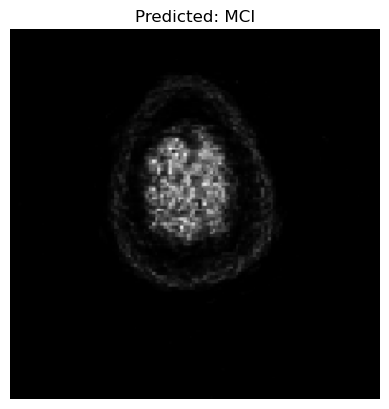

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


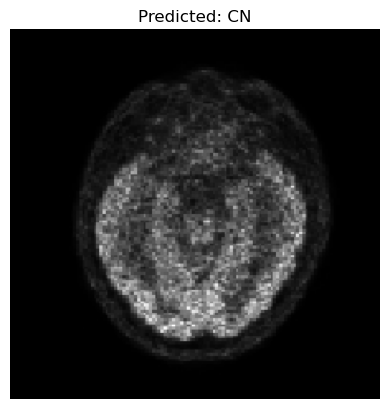

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


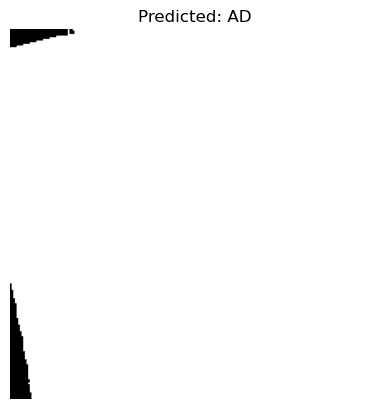

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


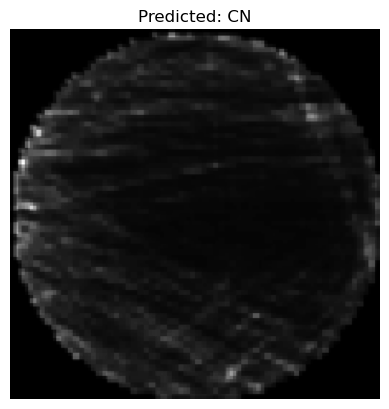

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


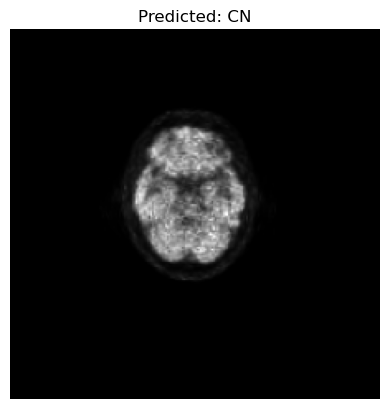

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


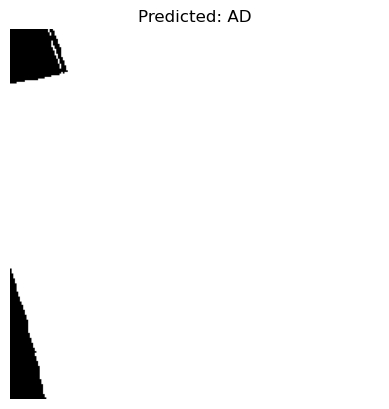

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


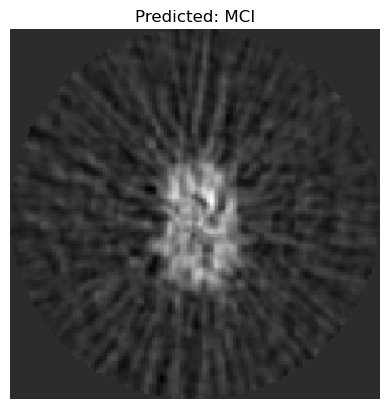

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


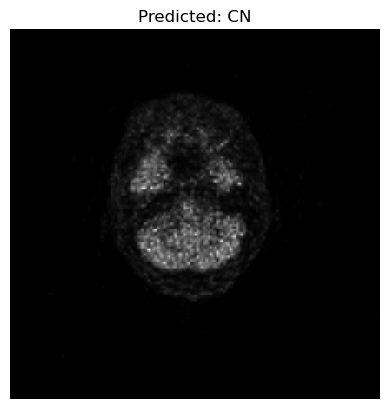

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


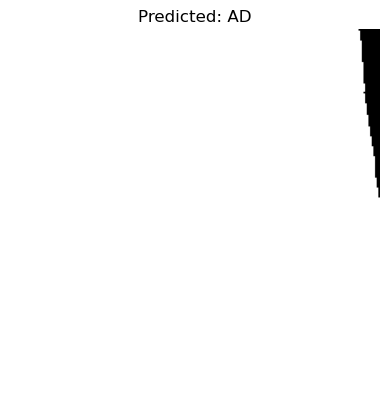

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


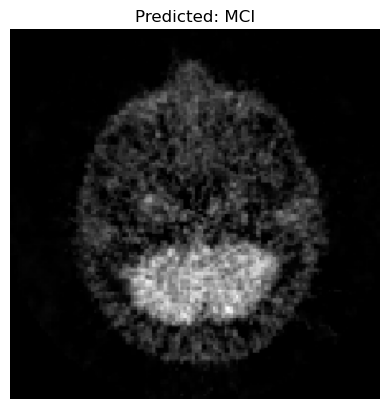

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


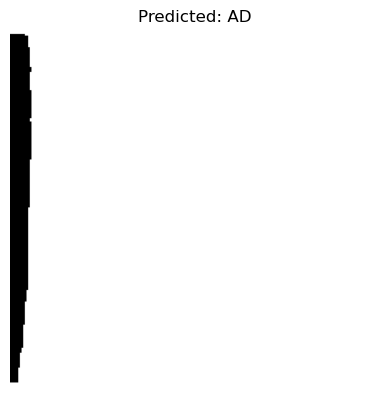

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


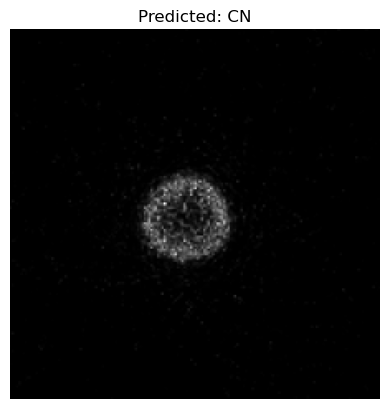

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


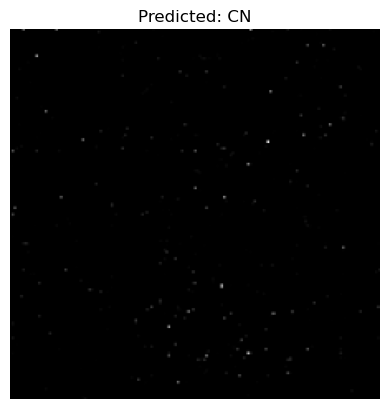

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


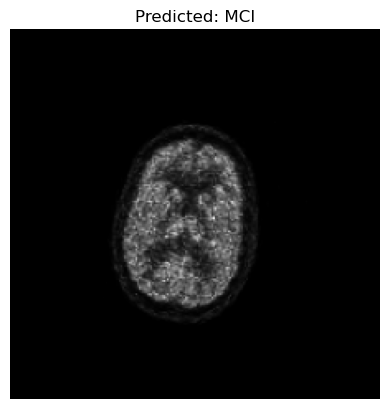

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


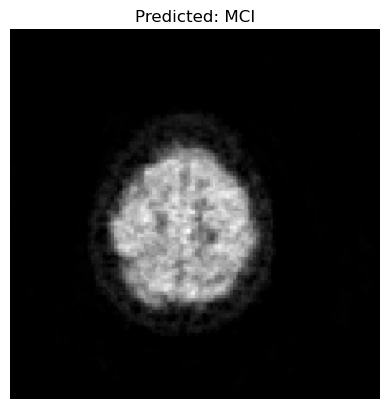

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


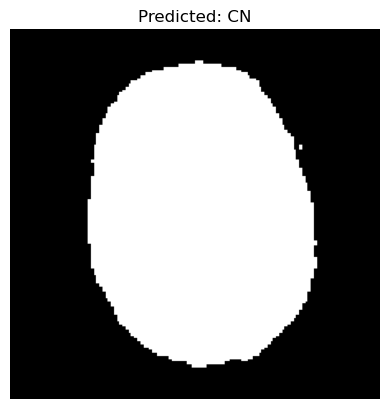

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


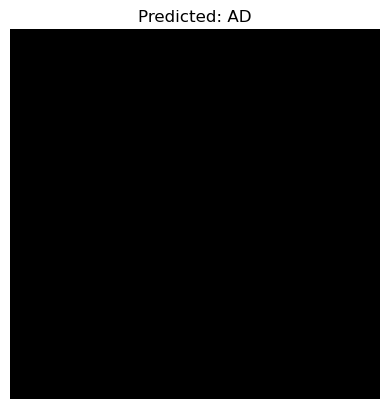

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


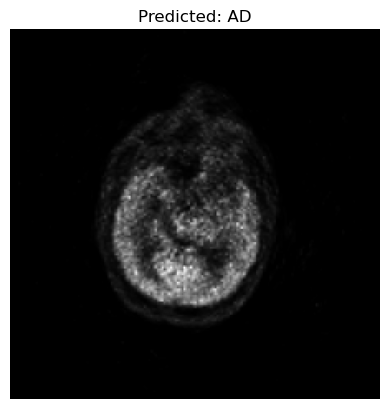

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


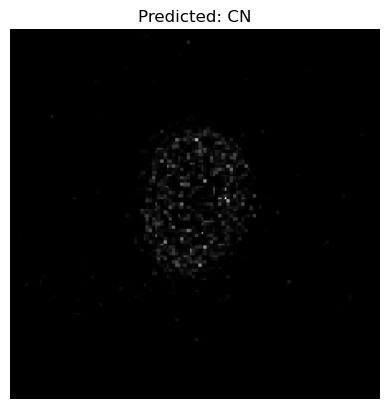

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


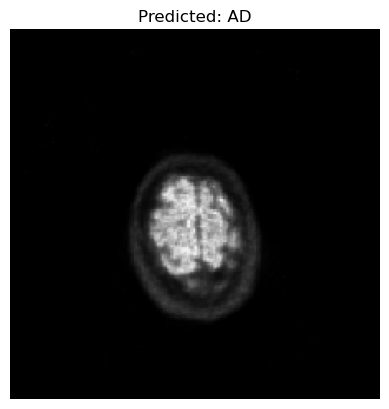

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


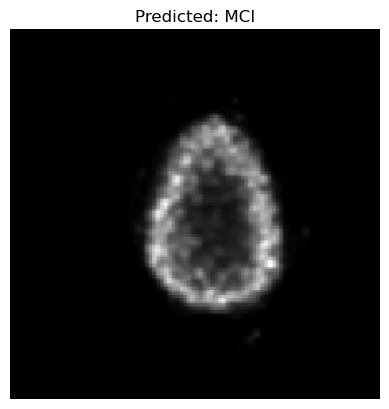

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


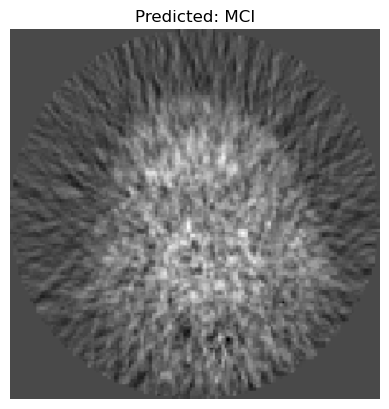

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


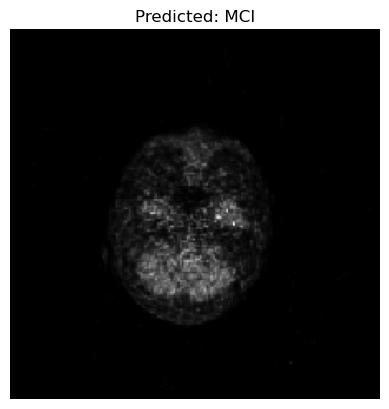

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


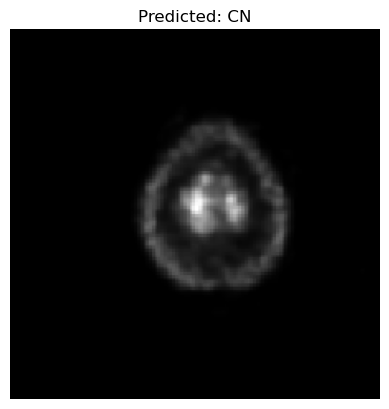

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


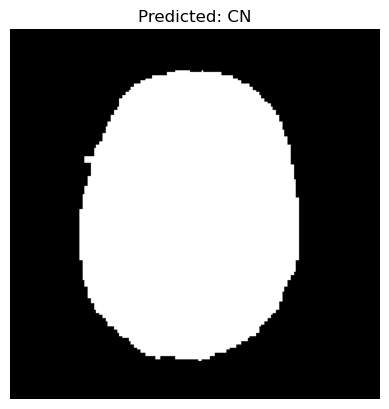

Predictions saved to D:/CIP_PET/model_predictions.csv


In [68]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("D:/CIP_PET/PET_Model.h5")

# Define class labels (Update based on your dataset)
class_labels =  {0: "AD", 1: "CN", 2: "MCI"}

# Path to test images
test_images_dir = "D:/CIP_PET/split_pet_images/test"

# Get all test images
# Get all image paths
all_files = []
for root, _, files in os.walk(test_images_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            all_files.append(os.path.join(root, file))

# Randomly select images (up to 25)
num_samples = min(25, len(all_files))
if num_samples == 0:
    raise ValueError("No image files found in the specified directory.")
random_images = random.sample(all_files, num_samples)



# Store predictions
predictions_list = []

# Process each image
for img_path in random_images:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Store results
    predictions_list.append({"Image": img_path, "Predicted Class": predicted_label})

    # Display image and prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# Convert predictions to DataFrame
df = pd.DataFrame(predictions_list)

# Save predictions to CSV
csv_path = "D:/CIP_PET/model_predictions.csv"
df.to_csv(csv_path, index=False)
print(f"Predictions saved to {csv_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


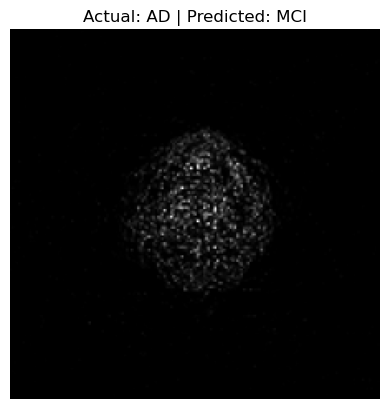

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


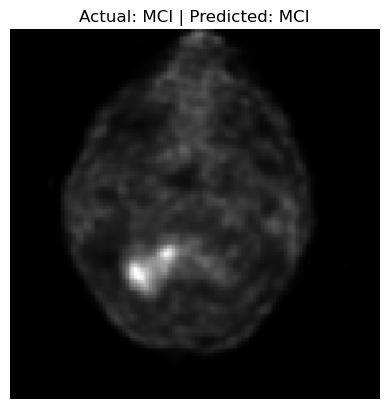

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


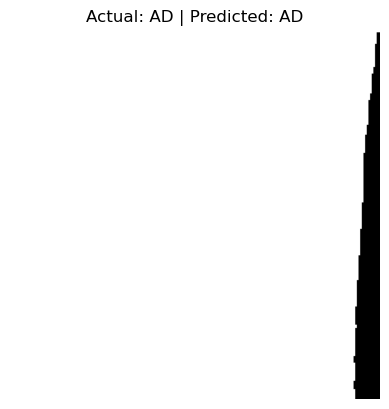

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


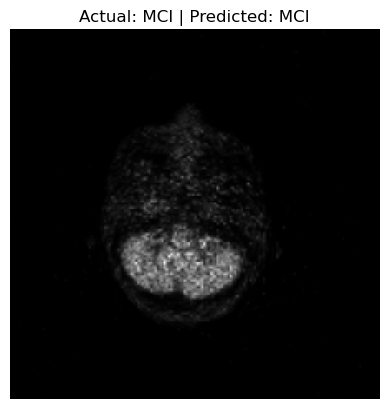

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


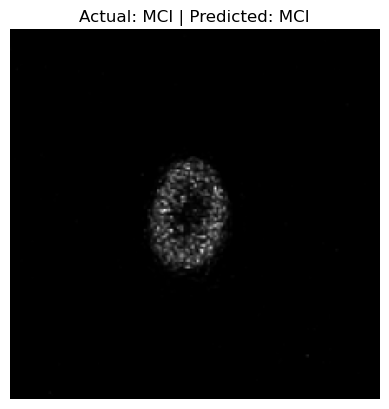

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


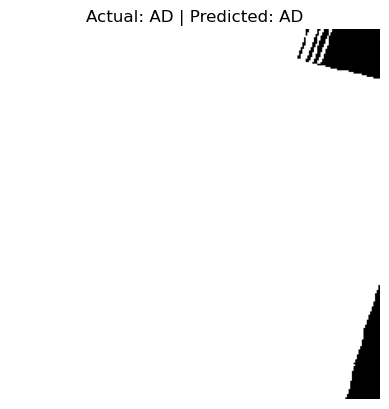

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


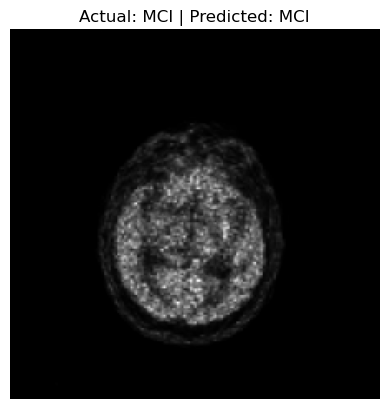

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


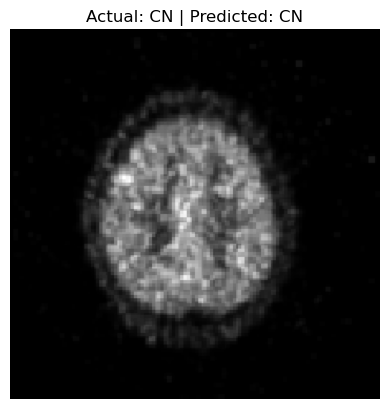

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


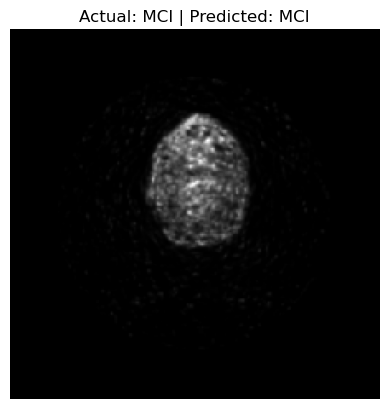

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


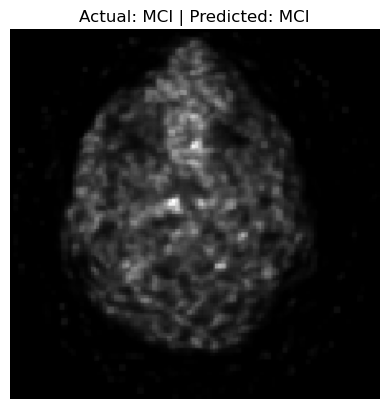

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


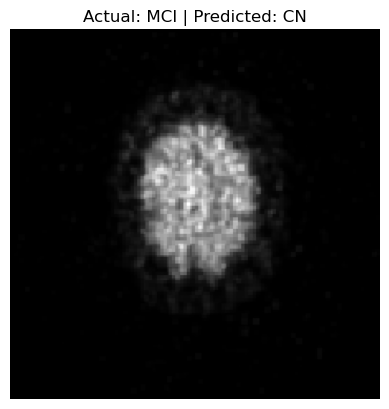

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


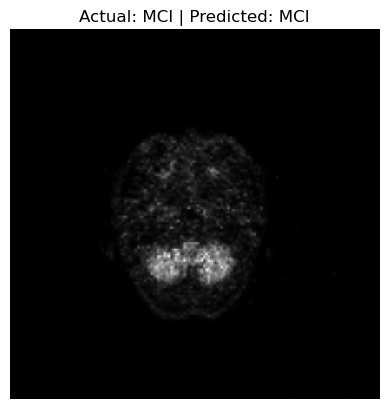

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


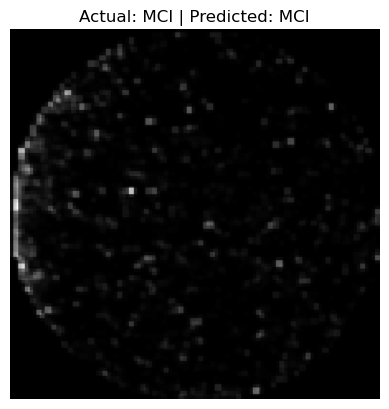

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


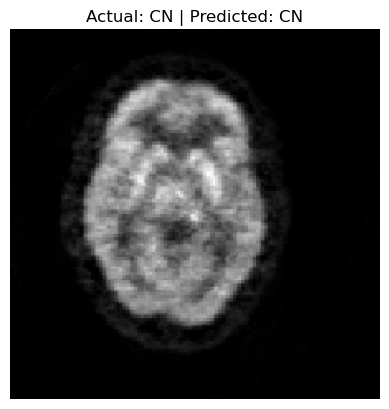

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


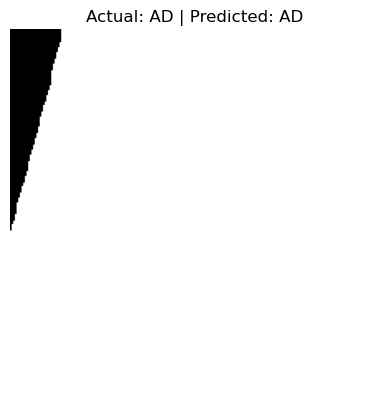

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


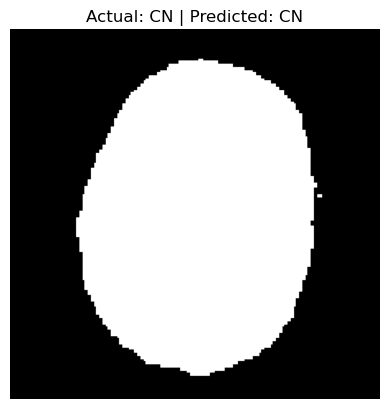

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


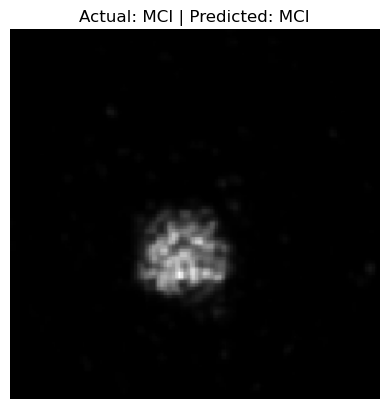

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


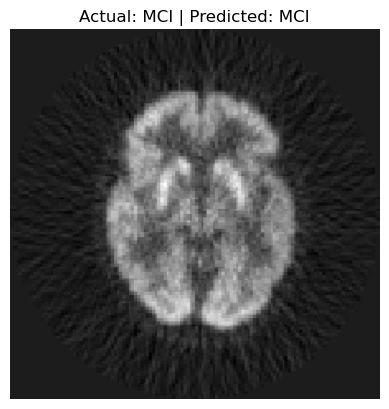

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


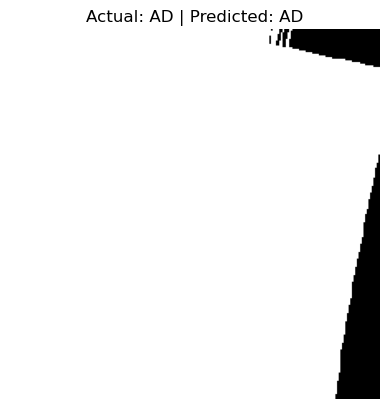

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


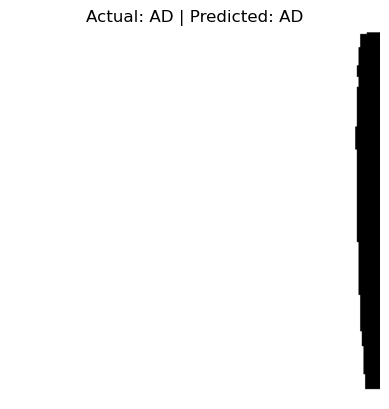

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


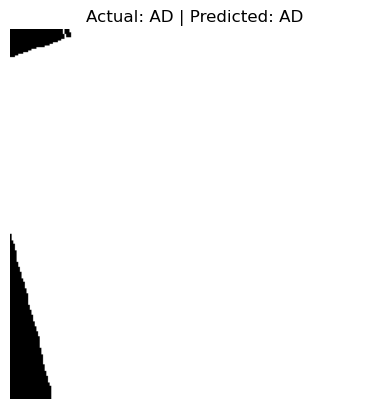

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


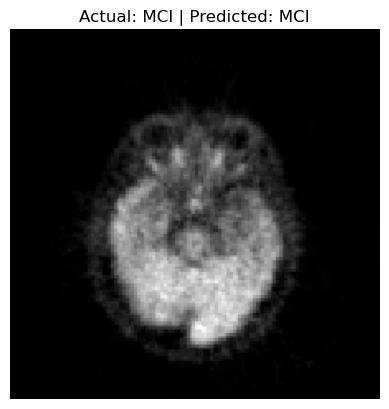

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


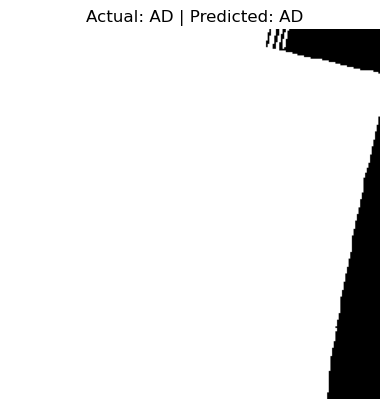

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


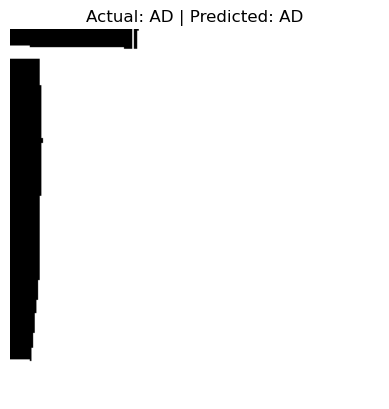

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


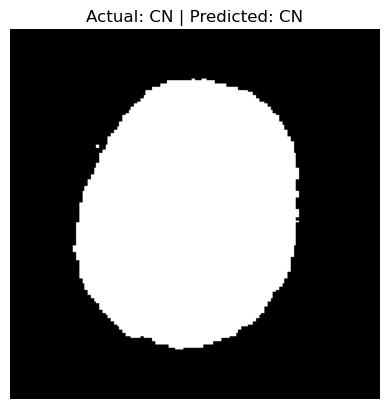

✅ Predictions saved to D:/CIP_PET/test_predictions_pet.csv


In [80]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained PET model
model = load_model("D:/CIP_PET/PET_Model.h5")

# Define class labels
class_labels = {0: "AD", 1: "CN", 2: "MCI"}

# Path to PET test/validation images
test_images_dir = "D:/CIP_PET/split_pet_images/val"

# Get all test images along with actual labels
all_files = []
for root, _, files in os.walk(test_images_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            actual_class = os.path.basename(root)
            all_files.append((os.path.join(root, file), actual_class))

# Randomly select up to 25 images
num_samples = min(25, len(all_files))
if num_samples == 0:
    raise ValueError("No image files found in the specified directory.")
random_images = random.sample(all_files, num_samples)

# Store predictions
predictions_list = []

# Process each image
for img_path, actual_class in random_images:
    # Load and preprocess the image
# Load and preprocess the image
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 1)

# Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_class]



    # Store result
    predictions_list.append({
        "Image": img_path,
        "Actual Class": actual_class,
        "Predicted Class": predicted_label
    })

    # Display image and prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"Actual: {actual_class} | Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# Save to CSV
df = pd.DataFrame(predictions_list)
csv_path = "D:/CIP_PET/test_predictions_pet.csv"
df.to_csv(csv_path, index=False)
print(f"✅ Predictions saved to {csv_path}")


In [82]:
from sklearn.metrics import confusion_matrix, classification_report

# Load predictions from CSV
df = pd.read_csv("D:/CIP_PET/test_predictions_pet.csv")

# Convert labels to numerical values
actual = df["Actual Class"].map({"AD": 0, "CN": 1, "MCI": 2})
predicted = df["Predicted Class"].map({"AD": 0, "CN": 1, "MCI": 2})

# Compute confusion matrix
cm = confusion_matrix(actual, predicted)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(actual, predicted, target_names=["AD", "CN", "MCI"])
print("Classification Report:\n", report)


Confusion Matrix:
 [[ 8  0  1]
 [ 0  4  0]
 [ 0  1 11]]
Classification Report:
               precision    recall  f1-score   support

          AD       1.00      0.89      0.94         9
          CN       0.80      1.00      0.89         4
         MCI       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.91      0.94      0.92        25
weighted avg       0.93      0.92      0.92        25

